In [25]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import struct as st
import seaborn as sns
import cmocean
import palettable
import ioeddy as io
from   matplotlib import rc
from   scipy.io import FortranFile

fss = 12;
fsl = 15;

sns.set_context('paper')
sns.set(color_codes=True, font_scale=1.75)
sns.set_palette('PuBuGn_d')
sns.set_style('ticks', {'font.family'     : ['serif'],
                        'font.serif'      : ['Times'],
                        'xtick.major.size': 3.0,
                        'xtick.minor.size': 1.5,
                        'ytick.major.size': 3.0,
                        'ytick.minor.size': 1.5,
                        'axes.edgecolor'  : 'k',
                        'axes.labelcolor' : 'k',
                        'text.color'      : 'k',
                        'xtick.color'     : 'k',
                        'ytick.color'     : 'k',
                        'image.cmap'      : 'PuBuGn'})

rc('text', usetex=True)


plt.rc('figure', figsize=[8.0, 5.0])
plt.rc('mathtext', fontset='stix')
plt.rc('axes', linewidth=1.0)
plt.rc('xtick.major', width=1.0)
plt.rc('ytick.major', width=1.0)
plt.rc('xtick.minor', width=1.0)
plt.rc('ytick.minor', width=1.0)
plt.rc('font', size=fss)
plt.rc('xtick', labelsize=fss)
plt.rc('ytick', labelsize=fss)
plt.rc('axes', labelsize=fsl)
plt.rc('axes', titlesize=fss)
plt.rc('lines', linewidth=1.0)
plt.rc('lines', markersize=4.0)
plt.rc('pdf', fonttype=3)
plt.rc('ps', fonttype=3)
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('text.latex', preamble=[r"\usepackage[T1]{fontenc}", r"\usepackage{amsmath}"])

In [26]:
###..............................Reading the low dimensional modes.................................
N = 250

file = '/home/sheel/Work/projects/spod_re5e4/post/frinf/snapshot_dmd_data/dmd_uniform/x_D_50/frinf_2111900_stride500_n251/fort.4'
A = np.loadtxt(file)
eigY = np.zeros((N,N))

for i in range(0,N):
    for j in range(0,N):
        eigY[i,j] = A[i*N + j]

###-------------------Normalizing the eigenvectors--------------------------------
for i in range(0,N):
    eigY[:,i] = eigY[:,i]/np.linalg.norm(eigY[:,i])

In [27]:
print(eigY.shape)
print(np.amin(eigY))
print(np.amax(eigY))
print(np.linalg.norm(eigY[:,2]))

(250, 250)
-0.9999973910393549
0.6548476629396882
0.9999999999999999


In [28]:
###.......................Reading the U matrix from the binary file.................................. 

nr = 354
ntheta = 256
numvar = 3

Nrows = nr*ntheta*numvar

path = '/home/sheel/Work/projects/spod_re5e4/post/frinf/snapshot_dmd_data/dmd_uniform/x_D_50/frinf_2111900_stride500_n251/u_files/'

file_header = 'u'
filename = path + file_header

U = np.zeros((Nrows, N))

for i in range(0, N):
    num = i + 1
    filename   =  path + file_header + '%05d'%num + '.bin'
    A = np.fromfile(filename, dtype=np.float64)
    f = FortranFile(filename, 'r')          ## Defining the fortran file
    a = f.read_reals(dtype='float64')       ## Reading from fortran file
    U[:,i] = a

In [29]:
print(U.shape)
print(np.amin(U))
print(np.amax(U))

(271872, 250)
-0.017264566127635786
0.019662239555860057


In [30]:
###......................Constructing the full field DMD modes as Psi = U * eigY......................

loc_array = np.array([0, 22, 23, 26, 27, 30, 31])   ## Modes which you want to compute 

nit = loc_array.size

print(nit)

full_mode = np.zeros((nr*ntheta*numvar, nit))

for i in range(0, loc_array.size):
    full_mode[:,i] = np.matmul(U,eigY[:,loc_array[i]])

7


In [31]:
###.........................................Visualize DMD modes..............................

nr = 354; ntheta = 256

u_eigenmode = np.zeros((nr, ntheta+2, nit))
v_eigenmode = np.zeros((nr, ntheta+2, nit))
w_eigenmode = np.zeros((nr, ntheta+2, nit))
# rho_eigenmode = np.zeros((nr, ntheta+2, N))


for i in range(0, nit):
    u_mode_flat = full_mode[0:nr*ntheta,i]
    print(np.amin(u_mode_flat)); print(np.amax(u_mode_flat)) 
    u_mode = np.reshape(u_mode_flat,(nr, ntheta), order = 'F')
    
    v_mode_flat = full_mode[nr*ntheta:2*nr*ntheta, i]
    print(np.amin(v_mode_flat)); print(np.amax(v_mode_flat)) 
    v_mode = np.reshape(v_mode_flat,(nr, ntheta), order = 'F')
    
    w_mode_flat = full_mode[2*nr*ntheta:3*nr*ntheta, i]
    print(np.amin(w_mode_flat)); print(np.amax(w_mode_flat)) 
    w_mode = np.reshape(w_mode_flat,(nr, ntheta), order = 'F')

#     rho_mode_flat = full_mode[3*nr*ntheta:4*nr*ntheta, i-nstart_mode]
#     print(np.amin(w_mode_flat)); print(np.amax(rho_mode_flat)) 
#     rho_mode = np.reshape(rho_mode_flat,(nr, ntheta), order = 'F')
    
    
    u_eigenmode[:,1:-1,i] = u_mode  ## Final matrix containing u-velocity eigenmodes
    u_eigenmode[:,0,i]    = u_mode[:,-1]
    u_eigenmode[:,-1,i]   = u_mode[:,0]
    
    v_eigenmode[:,1:-1,i] = v_mode  ## Final matrix containing v-velocity eigenmodes
    v_eigenmode[:,0,i]    = v_mode[:,-1]
    v_eigenmode[:,-1,i]   = v_mode[:,0]
    
    w_eigenmode[:,1:-1,i] = w_mode  ## Final matrix containing w-velocity eigenmodes
    w_eigenmode[:,0,i]    = w_mode[:,-1]
    w_eigenmode[:,-1,i]   = w_mode[:,0]

#     rho_eigenmode[:,1:-1,i-nstart_mode] = rho_mode  ## Final matrix containing w-velocity eigenmodes
#     rho_eigenmode[:,0,i-nstart_mode]    = rho_mode[:,-1]
#     rho_eigenmode[:,-1,i-nstart_mode]   = rho_mode[:,0]


-2.3974805464699656e-05
4.1062693971383255e-05
-2.2593410076968404e-05
2.9688264934646905e-05
0.0032349206116701304
0.003362359987632704
-0.007856515736532076
0.007983532637372602
-0.007774104342096851
0.0060139070713186036
-0.008684805992906157
0.0075651960898338675
-0.009531720469169233
0.006648766345741604
-0.005226736444144063
0.0054748095858528426
-0.009412725102073088
0.0127373441155855
-0.01283789254425069
0.005422416103023563
-0.005875222137386063
0.006869573885516728
-0.007607768916826241
0.009975048522381052
-0.0069563209805573924
0.006047137259243228
-0.008019833667743049
0.008590828990156821
-0.0058527375014410556
0.010500178281977648
-0.005273205873814585
0.008083210952200834
-0.006332245942720459
0.005608038935018885
-0.008760600911839608
0.006497317045783354
-0.006165268686672571
0.0057092261099356174
-0.008278695994666371
0.007822347136129231
-0.009720342974962104
0.0057711475258304615


In [32]:
print(np.amin(u_eigenmode)), print(np.amax(u_eigenmode))
print(np.amin(v_eigenmode)), print(np.amax(v_eigenmode))
print(np.amin(w_eigenmode)), print(np.amax(w_eigenmode))
# print(np.amin(rho_eigenmode)), print(np.amax(rho_eigenmode))

-0.01283789254425069
0.008083210952200834
-0.008278695994666371
0.008590828990156821
-0.009720342974962104
0.0127373441155855


(None, None)

In [33]:
###...............................Reading the axial slices......................................

# Read Grid
nx, index, x, xe, xc = io.readgrid('/home/sheel/Work/projects/spod_re5e4/grid/frinf/x3_grid.in')
nr, index, r, re, rc = io.readgrid('/home/sheel/Work/projects/spod_re5e4/grid/frinf/x1_grid.in')
ntheta = 258
nr_trunc = nr - 10 + 1

print("Number of grid points in x direction", nx)
print("Number of grid points in r direction", nr)
print("Number of grid points in theta direction", ntheta)

Number of grid points in x direction 4609
Number of grid points in r direction 365
Number of grid points in theta direction 258


In [34]:
###.........................................Creating the meshgrid.....................................

v = 5
idx = (np.abs(v - rc)).argmin()
print(idx)

azimuths = np.linspace(-(0.5)*2*np.pi/(ntheta-2),2*np.pi+0.5*2*np.pi/(ntheta-2) , ntheta) 
R, THETA = np.meshgrid(rc[0:idx],azimuths)

R = R.T
THETA = THETA.T

print(R.shape)
print(THETA.shape)

256
(256, 258)
(256, 258)


Shape of mode (256, 258)
Minval of mode -0.009720342974962104
Maxval of mode 0.0057711475258304615


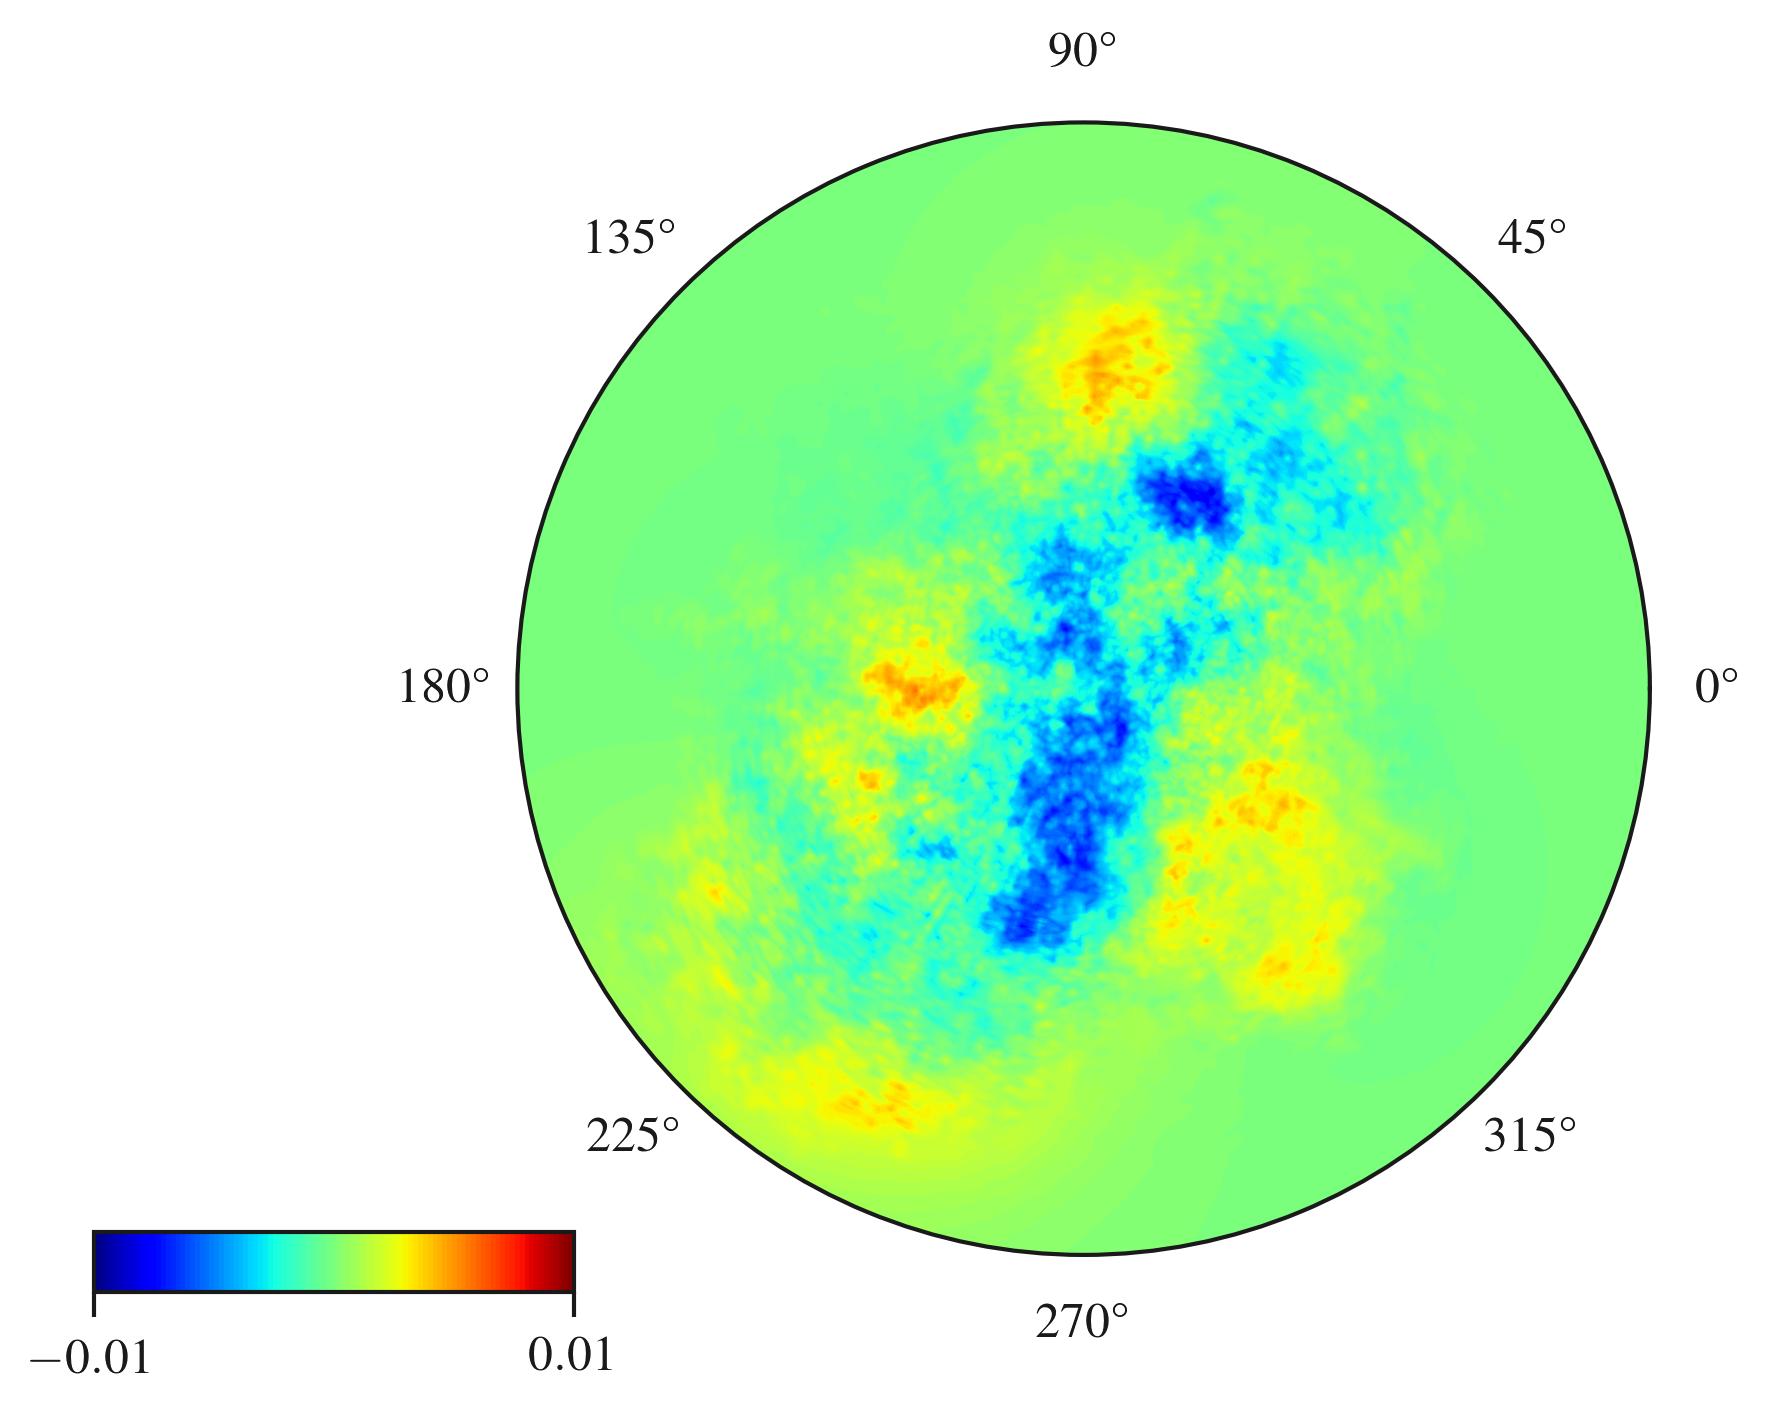

In [49]:
mode = w_eigenmode[0:idx,:,6]
print('Shape of mode', mode.shape)
print('Minval of mode', np.amin(mode))
print('Maxval of mode', np.amax(mode))


#fig = plt.figure(dpi=300)
fig, ax1 = plt.subplots(subplot_kw=dict(projection='polar'), dpi = 300)
cs1 = ax1.contourf(THETA, R, mode, cmap = 'jet', levels=np.linspace(-0.01,0.01,100))
cbaxes = fig.add_axes([0.1, 0.1, 0.2, 0.04])
plt.colorbar(cs1,cax = cbaxes,orientation = 'horizontal', ticks = [-0.01,0.01])
#plt.colorbar(cs1,orientation = 'horizontal', ticks = [-0.00005,0.00005], extend='both')

ax1.set_aspect(1.0)
plt.show()
fig.savefig('w_dmd_mode32_50.png', bbox_inches = 'tight')